# Nuages de mots

# Tp2

## Imports et stopwords

In [2]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Digit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Liste de Stopwords enrichis (Idem que dans s1)
sw = stopwords.words("french")
sw += ["abord", "ailleurs", "ainsi", "alors", "après", "avant", "avoir", "bien", "bientôt",
    "car", "ce", "ceci", "cela", "ces", "cet", "cette", "comme", "contre", "dans",
    "depuis", "dire", "doit", "donc", "elle", "encore", "enfin", "ensuite", "entre", "être",
    "fait", "faire", "faut", "hormis", "ici", "il", "ils", "jusqu'à", "les", "leur", "là",
    "ma", "mais", "mes", "moins", "mon", "ne", "non", "nous", "on", "ou", "ou bien", "par",
    "parce que", "parfois", "pas", "pendant", "peut", "plus", "plutôt", "pour", "puis",
    "quand", "quant à", "sans", "sa", "se", "ses", "son", "sous", "tant pis", "tandis que",
    "trois", "tôt ou tard", "toutefois", "toutes", "tu", "tous", "trois", "trois", "trois",
    "voilà", "à", "très"]
sw = set(sw)


## Créer un fichier contenant le texte de tous les journaux d'une année donnée

In [4]:
# Année choisie 
Decade = 1900
year = Decade

In [5]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
len(txts)

100

In [6]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [7]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

100

In [8]:
# Imprimer tous les caractères du contenu dans les  fichiers
for text in content_list:
    for char in text:
        print(char, end='') 

La bretelle, sur les origines de laquelle le;- •pinions sont contradictoires, n’en remonte pa,> moins à une honorable antiquité. De tous temps, bien que sous des formes diverses, elle a servi à maintenir la culotte et, plus tard, le pantalon. Sous Louis-Philippe, elle eut même son heure de gloire. On la vit aux culottes-à-pont de la garde nationale, et le roi lui-méme, dans telles estampes recherchées par l’amateur, apparait. en négligé, l'êpauie ornée d’une bretelle en tapisserie — offrande conjugale de la bomu veine Marie-Amélie. La bretelle, dont les Anglais ont fait, comme de toutes les choses qui leur servent dan- la vie courante, un accessoire pratique et commode, conserve encore, malgré les services rendus, un certains nombre d’ennemis irréductibles.  Mais glissons... Honorons la bretelle et tenons-la pour un très atile, très commode et même indispensable ‘ccessoire de la toilette. * * * Provenues chinois : D. — Quand un peuple est-il bien gouverné ? R. — Quand les sabres sont r

In [9]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [10]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

"La bretelle, sur les origines de laquelle le;- •pinions sont contradictoires, n’en remonte pa,> moins à une honorable antiquité. De tous temps, bien que sous des formes diverses, elle a servi à maintenir la culotte et, plus tard, le pantalon. Sous Louis-Philippe, elle eut même son heure de gloire. On la vit aux culottes-à-pont de la garde nationale, et le roi lui-méme, dans telles estampes recherchées par l’amateur, apparait. en négligé, l'êpauie ornée d’une bretelle en tapisserie — offrande con"

## Nettoyer le fichier à l'aide d'une fonction de nettoyage ok

### Créer la fonction de nettoyage (à adapter)

In [12]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [13]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1900_clean.txt!'

In [14]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'BRETELLE ORIGINES LAQUELLE PINIONS CONTRADICTOIRES REMONTE HONORABLE ANTIQUITÉ TEMPS FORMES DIVERSES SERVI MAINTENIR CULOTTE TARD PANTALON LOUIS PHILIPPE HEURE GLOIRE VIT CULOTTES PONT GARDE NATIONALE ROI MÉME TELLES ESTAMPES RECHERCHÉES AMATEUR APPARAIT NÉGLIGÉ ÊPAUIE ORNÉE BRETELLE TAPISSERIE OFFRANDE CONJUGALE BOMU VEINE MARIE AMÉLIE BRETELLE DONT ANGLAIS CHOSES SERVENT DAN VIE COURANTE ACCESSOIRE PRATIQUE COMMODE CONSERVE MALGRÉ SERVICES RENDUS CERTAINS NOMBRE ENNEMIS IRRÉDUCTIBLES GLISSONS '

## Nuage de mots

### Afficher les termes les plus fréquents


In [16]:
frequencies = Counter(after.split())
print(frequencies.most_common(50))

[('RUE', 5229), ('DEM', 3690), ('TOUT', 1659), ('MAISON', 1162), ('BRUXELLES', 1143), ('FILLE', 1137), ('ANS', 945), ('DEMANDE', 869), ('ROSSEL', 859), ('LOUER', 775), ('PLACE', 769), ('DEUX', 761), ('PRIX', 726), ('HEURES', 585), ('MIDI', 583), ('BON', 577), ('DIT', 552), ('GRAND', 539), ('CUIS', 535), ('DONT', 523), ('SACH', 512), ('DÉS', 499), ('BONNE', 496), ('NOTAIRE', 488), ('PEU', 484), ('NORD', 467), ('CHEZ', 464), ('MOIS', 432), ('SERVANTE', 427), ('POSTE', 417), ('BONS', 416), ('QUART', 410), ('JOUR', 407), ('FEMME', 405), ('ETC', 394), ('HOMME', 394), ('VILLE', 392), ('TOUTE', 391), ('VENDRE', 386), ('JEUNE', 383), ('VEND', 379), ('VAN', 377), ('PRÈS', 377), ('PARIS', 372), ('BNE', 372), ('CHAUSSÉE', 370), ('ADR', 369), ('HIER', 366), ('EAU', 366), ('SOIR', 355)]


### Créer, stocker et afficher le nuage de mots

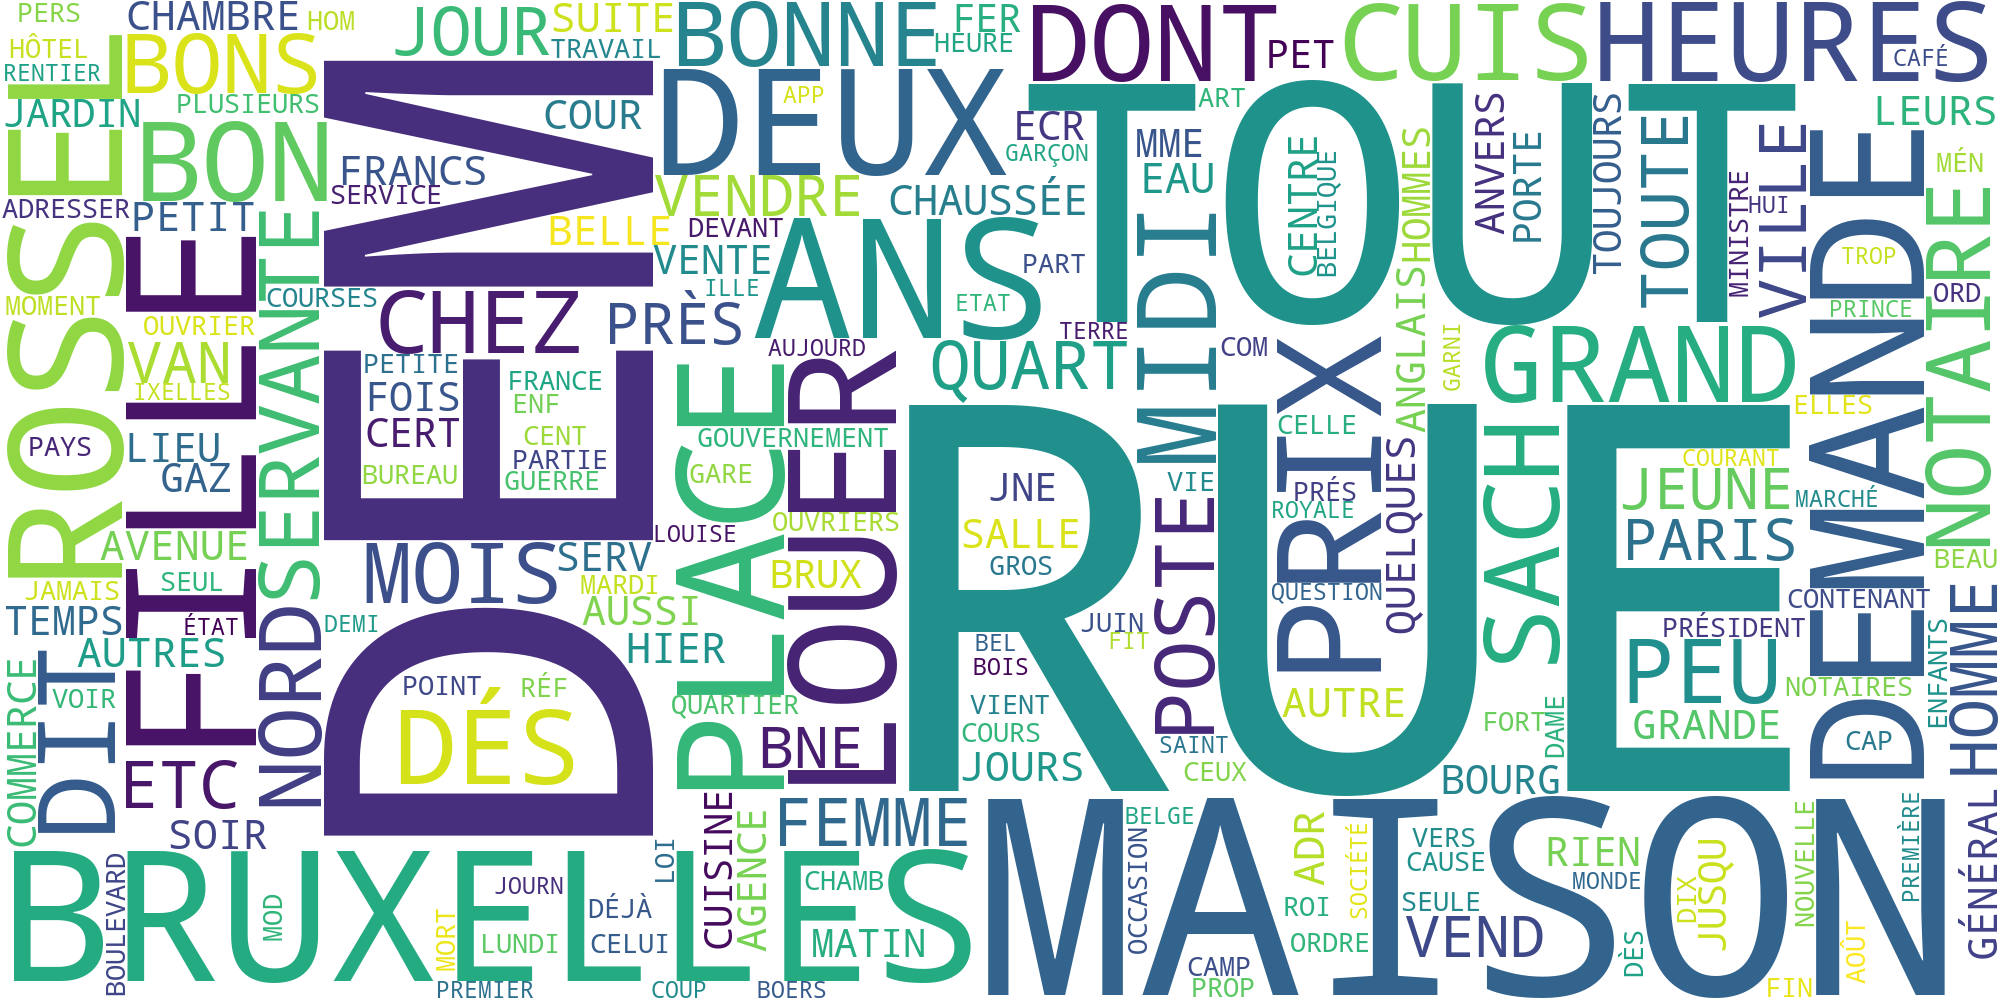

In [24]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))